In [ ]:
import numpy as np
import os
import scipy.io as sio
import cv2
import math
from math import cos, sin
import dlib
import glob
from pathlib import Path
import pandas as pd
from PIL import Image, ImageFilter
import xgboost as xgb
import dlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow

In [ ]:
df = pd.read_csv('final_data.csv')
df.drop(columns = ['Unnamed: 0'] , inplace = True)
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y61,y62,y63,y64,y65,y66,y67,yaw,pitch,roll
0,-0.464820,-0.462209,-0.438939,-0.417966,-0.382989,-0.325499,-0.257514,-0.145923,0.016448,0.194511,...,0.147591,0.163993,0.173953,0.212649,0.258275,0.256873,0.226044,0.018227,-0.399231,0.085676
1,0.149274,0.163997,0.181623,0.188976,0.182993,0.160698,0.129266,0.111438,0.159312,0.268268,...,0.096333,0.095195,0.091796,0.084089,0.098007,0.103587,0.103352,0.881137,-0.184650,-0.236852
2,-0.307044,-0.249122,-0.171575,-0.107151,-0.043876,0.020622,0.072306,0.150084,0.293834,0.434648,...,0.106834,0.094121,0.082327,0.035979,0.107180,0.125339,0.131517,0.299208,-0.175379,-0.373374
3,-0.546902,-0.503480,-0.451204,-0.401854,-0.336454,-0.231690,-0.115781,0.018249,0.199017,0.366049,...,0.158669,0.150495,0.144963,0.136836,0.146602,0.155128,0.160490,0.011965,-0.026812,-0.220662
4,-0.407695,-0.394305,-0.368310,-0.342812,-0.308292,-0.241912,-0.169114,-0.076251,0.084174,0.256083,...,0.175781,0.176320,0.171843,0.174760,0.177758,0.182677,0.182496,0.110732,0.057119,-0.043283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,-0.688849,-0.685845,-0.668133,-0.641599,-0.585898,-0.482550,-0.346062,-0.212605,-0.063596,0.054363,...,0.143401,0.139423,0.138711,0.116310,0.179006,0.187334,0.181499,-0.429723,-0.367547,0.122791
1321,-0.783723,-0.731010,-0.665789,-0.607387,-0.516579,-0.371697,-0.211494,-0.038635,0.131728,0.228010,...,0.134905,0.113160,0.098170,0.071929,0.193193,0.220363,0.230150,-0.485061,-0.015007,-0.313744
1322,-0.038701,-0.025435,0.002923,0.017041,0.010646,0.009706,-0.000278,0.036179,0.168336,0.336173,...,0.130491,0.120038,0.110151,0.121942,0.231560,0.246244,0.247388,0.567114,-0.156035,-0.108536
1323,-0.541754,-0.535425,-0.506778,-0.474963,-0.431498,-0.365969,-0.281931,-0.168308,-0.010820,0.145318,...,0.163677,0.167193,0.175641,0.185310,0.204658,0.204024,0.190848,-0.070430,-0.197102,0.105118


In [ ]:
X = df.iloc[: , :136]
y = df.iloc[: , 136:]

In [ ]:
X.shape

(1325, 136)

In [ ]:
X.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y58,y59,y60,y61,y62,y63,y64,y65,y66,y67
count,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,...,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
mean,-0.413146,-0.396971,-0.366212,-0.336636,-0.295763,-0.233276,-0.163345,-0.071293,0.070680,0.214691,...,0.230754,0.199625,0.142330,0.135763,0.134928,0.134918,0.140687,0.175535,0.180873,0.174571
std,0.253334,0.246806,0.241446,0.234341,0.217239,0.184144,0.143227,0.109615,0.103965,0.122302,...,0.047635,0.041125,0.040947,0.029182,0.030909,0.036280,0.056182,0.047316,0.045026,0.040628
min,-1.018305,-0.933369,-0.870445,-0.828853,-0.747490,-0.612254,-0.478472,-0.348366,-0.199985,-0.120122,...,0.112196,0.074803,0.009892,0.047550,0.052848,0.037700,-0.018105,0.067556,0.074609,0.073520
25%,-0.583350,-0.568131,-0.540039,-0.512379,-0.464446,-0.373822,-0.269494,-0.148259,0.004722,0.137810,...,0.196113,0.169344,0.113012,0.113894,0.110635,0.107814,0.102693,0.142303,0.148811,0.145969
50%,-0.482648,-0.472639,-0.444664,-0.411127,-0.358825,-0.287316,-0.199188,-0.089498,0.064690,0.218188,...,0.234259,0.203312,0.143762,0.135699,0.135123,0.135967,0.140388,0.174386,0.180699,0.175738
75%,-0.283524,-0.267880,-0.237509,-0.209105,-0.167953,-0.116238,-0.076088,-0.004479,0.132222,0.287951,...,0.262392,0.227848,0.170186,0.158206,0.158426,0.160593,0.176965,0.204947,0.208545,0.198742
max,0.299009,0.297251,0.336364,0.368889,0.380717,0.379171,0.345283,0.314620,0.440849,0.644132,...,0.390114,0.327354,0.270385,0.227769,0.232992,0.252120,0.317703,0.355265,0.357666,0.334395


In [ ]:
y

,yaw,pitch,roll
0,0.018227,-0.399231,0.085676
1,0.881137,-0.184650,-0.236852
2,0.299208,-0.175379,-0.373374
3,0.011965,-0.026812,-0.220662
4,0.110732,0.057119,-0.043283
...,...,...,...
1320,-0.429723,-0.367547,0.122791
1321,-0.485061,-0.015007,-0.313744
1322,0.567114,-0.156035,-0.108536
1323,-0.070430,-0.197102,0.105118


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [ ]:
r1 = xgb.XGBRegressor(n_estimators=500 , learning_rate=0.1 , max_depth = 6 , nthread = -1 ,seed = 0)
r2 = RandomForestRegressor(n_estimators=10, random_state=0 , max_depth=6 ,n_jobs=1)
model1 = VotingRegressor(estimators=[('xg', r1), ('rf', r2)],n_jobs=-1).fit(X_train , y_train['roll'])
model2 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, min_child_weight=1, gamma=0, subsample=1, colsample_bytree=0.8, nthread=6, seed=100).fit(X_train, y_train["yaw"])
model3 = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.31, max_depth=4, min_child_weight=1, subsample=1, colsample_bytree=1, nthread=6).fit(X_train, y_train["pitch"])

[04:08:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
X_test

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y58,y59,y60,y61,y62,y63,y64,y65,y66,y67
889,0.131766,0.135095,0.148553,0.153695,0.143493,0.118228,0.081411,0.063651,0.105069,0.207447,...,0.142858,0.139641,0.126076,0.092624,0.082295,0.077041,0.080476,0.091670,0.100924,0.107157
467,-0.501203,-0.479357,-0.441160,-0.403122,-0.349278,-0.268065,-0.176842,-0.062297,0.094424,0.249145,...,0.247354,0.214260,0.174142,0.154474,0.145291,0.147513,0.145236,0.172753,0.183733,0.180508
887,-0.818215,-0.792542,-0.746953,-0.700073,-0.626390,-0.503451,-0.349585,-0.159707,0.045361,0.182792,...,0.219826,0.208991,0.185494,0.160243,0.150971,0.134827,0.096170,0.137042,0.155310,0.158154
175,-0.742838,-0.720006,-0.676115,-0.636892,-0.570914,-0.475045,-0.369018,-0.214316,0.020539,0.251924,...,0.276486,0.222831,0.126974,0.164561,0.165388,0.160844,0.131892,0.198422,0.206886,0.198583
1155,-0.490833,-0.498449,-0.489288,-0.471479,-0.429007,-0.362657,-0.281651,-0.179283,-0.037987,0.097340,...,0.168042,0.125703,0.051276,0.104189,0.118802,0.125450,0.109629,0.136223,0.132886,0.114398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,-0.597632,-0.565888,-0.519053,-0.473709,-0.422431,-0.346384,-0.251720,-0.108854,0.084407,0.276416,...,0.234134,0.215863,0.174052,0.156402,0.148655,0.151722,0.159089,0.165240,0.166138,0.171070
712,-0.643864,-0.616288,-0.571630,-0.525550,-0.452097,-0.351933,-0.239091,-0.091776,0.086835,0.240463,...,0.275964,0.254628,0.211762,0.171815,0.164552,0.166415,0.186561,0.208458,0.216575,0.212042
931,-0.572978,-0.550075,-0.513029,-0.476411,-0.426209,-0.342459,-0.243770,-0.120075,0.057743,0.234873,...,0.284240,0.242313,0.162732,0.159375,0.156299,0.156458,0.152755,0.216193,0.224743,0.215243
136,-0.164251,-0.128758,-0.083176,-0.045140,-0.010432,0.018737,0.035560,0.073343,0.172175,0.302995,...,0.176173,0.157528,0.118123,0.101079,0.099852,0.093841,0.095472,0.115775,0.120984,0.121298


In [ ]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

In [ ]:
print(model1.score(X_train , y_train['roll']),\
model2.score(X_train , y_train['yaw']),\
model3.score(X_train , y_train['pitch']))

0.996943408702608 0.9997394446664888 0.9999855686694493


In [ ]:
print(model1.score(X_test , y_test['roll']),\
model2.score(X_test , y_test['yaw']),\
model3.score(X_test , y_test['pitch']))

0.9765630379973393 0.997480709231593 0.9553021757570246


# draw axis

In [ ]:
def draw_axis(img, yaw, pitch, roll, tdx=None, tdy=None, size = 100):

    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),5)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),5)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),5)

    return img

In [ ]:
cols = X_test.iloc[:1].columns
cols

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       ...
       'y58', 'y59', 'y60', 'y61', 'y62', 'y63', 'y64', 'y65', 'y66', 'y67'],
      dtype='object', length=136)

In [ ]:
X_test.iloc[:1].shape

(1, 136)

#Try 

*************


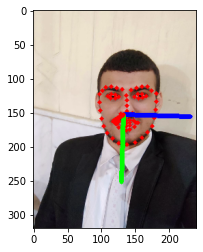

<Figure size 5760x4320 with 0 Axes>

error: ignored

In [ ]:
cap1 = cv2.VideoCapture("/content/WhatsApp Image 2021-08-13 at 2.44.03 AM.jpeg")
# cap = cv2.VideoCapture(0)
hog_face_detector = dlib.get_frontal_face_detector()

dlib_facelandmark = dlib.shape_predictor("/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat")
# pointx = []
# pointy = []
caps=[cap1]
while True:
    for cap in caps:
        pointx = []
        pointy = []
    
        _, frame = cap.read()
        frame = cv2.resize(frame , (0,0) , fx=0.25 , fy=0.25)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = hog_face_detector(gray)
        for face in faces:

            face_landmarks = dlib_facelandmark(gray, face)
    #         print(face_landmarks)

            for n in range(0, 68):
                x = face_landmarks.part(n).x
                pointx.append(float(x))
                y1 = face_landmarks.part(n).y
                pointy.append(float(y1))
                cv2.circle(frame, (x, y1), 1, (0, 0, 255), 3)
    #             print("X , y : " , f" ({x} ,{y})" , f"------> {n}")
                if n == 67:
                    print("*************")
    # #     print()
    # #     print(pointx)
    # #     print(len(pointx))
    # #     print("****")
    # #     print(pointy)
    # #     print("****")
        points = np.array(pointx + pointy)
    #     print(points , len(points) , type(points))
    #     print("*****")
    # #     print(points)
    # #     print("****")
    # #     print(data.iloc[0,:])
    # #     print("****")
        #print(points.shape)
    # #     print(arx)
    # #     print(ary)
        points[:68] = (points[:68] - points[32])/points[20]
    # #     print(points)
        points[68:136] = (points[68:136] - points[100])/points[88]
    #     print(points , len(points))
    # #     print("****")
    # #     print(df_copy.iloc[0,32] , points[32])
    # #     print(df_copy.iloc[0,100] , points[100])
#         print(points , len(points))
    #     print("****")
    #     print(df_copy.iloc[0,:])
        #break
    #     cv2.imshow("Face Landmarks", frame)
        nose_x, nose_y = pointx[32] , pointy[32]
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        p = pd.DataFrame(data = points.reshape(1,-1) , columns = list(cols))
        roll = model1.predict(p)[0]
        yaw = model2.predict(p)[0]
        pitch = model3.predict(p)[0]

    #     plt.imshow(draw_axis(frame, -1*0.018227,-0.399231,0.085676, nose_x, nose_y))
        plt.imshow(draw_axis(frame, -1*yaw , pitch, roll, nose_x, nose_y))


        plt.figure(figsize=(80, 60))

        plt.show()


        key = cv2.waitKey(5)
        if key == 27:
            break
cap.release()
cv2.destroyAllWindows()

#live video

In [ ]:
import cv2
import numpy as np

# Create a VideoCapture object
cap = cv2.VideoCapture("/content/drive/MyDrive/VID_20220618_075731.mp4")

# Check if camera opened successfully
if (cap.isOpened() == False): 
  print("Unable to read camera feed")

# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('/content/drive/MyDrive/outpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

while(True):
  ret, frame = cap.read()
  pointx = []
  pointy = []
  if ret == True: 
    #frame = cv2.resize(frame, None, fx=0.75, fy=0.75, interpolation=cv2.INTER_AREA)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = hog_face_detector(gray)
    for face in faces:

        face_landmarks = dlib_facelandmark(gray, face)
#         print(face_landmarks)

        for n in range(0, 68):
            x = face_landmarks.part(n).x
            pointx.append(float(x))
            y = face_landmarks.part(n).y
            pointy.append(float(y))
            cv2.circle(frame, (x, y), 2 , (0, 0, 255), 1)
# #             print("X , y : " , f" ({x} ,{y})" , f"------> {n}")
            if n == 67:
                print("*************")

        points = np.array(pointx + pointy)
        # #
        points[:68] = (points[:68] - points[32])/points[20]
    # #     print(points)
        points[68:136] = (points[68:136] - points[100])/points[88]


# #     cv2.imshow("Face Landmarks", frame)
        nose_x, nose_y = pointx[32] , pointy[32]
#     #     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        p = pd.DataFrame(data = points.reshape(1,-1) , columns = list(cols))
        roll = model1.predict(p)[0]
        yaw = model2.predict(p)[0]
        pitch = model3.predict(p)[0]
    # Write the frame into the file 'output.avi'
    out.write(draw_axis(frame,-1*yaw, pitch, roll, tdx = nose_x, tdy = nose_y))

    # Display the resulting frame    
    #cv2_imshow(frame)

    # Press Q on keyboard to stop recording
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

  # Break the loop
  else:
    break  

# When everything done, release the video capture and video write objects
cap.release()
out.release()

# Closes all the frames
cv2.destroyAllWindows()

*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
*************
******